# **Abstract**


This notebook takes a deep dive into the crucial steps of data preparation for neural networks, using the well-known MNIST dataset of handwritten digits as a basis. It steps beyond the convenience of built-in data loading APIs to shed light on the foundational preprocessing tasks necessary for using deep learning frameworks such as PyTorch and TensorFlow. Key preprocessing tasks covered include normalizing pixel values, reshaping images into the correct input format, and segmenting the dataset into training and validation sets. With hands-on examples, the notebook equips readers with practical skills for transforming real-world data into a clean, model-ready format, an essential step for achieving optimal performance in deep learning applications.

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing the dataset
dataset = "/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv"
df = pd.read_csv(dataset)

In [4]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **To display the characterstics of the dataset**

In [5]:
print(f"The Shape of the Dataset is: {df.shape}")
print(f"The Number of Samples the dataset contains: {df.shape[0]}")
print(f"The Number of Features the dataset contains: {df.shape[1]}")

The Shape of the Dataset is: (274093, 786)
The Number of Samples the dataset contains: 274093
The Number of Features the dataset contains: 786


**Number of Unique characters in the dataset**

In [6]:
num_of_unique_chars = len(df.labels.unique())
print(f"Unique characters present in the Dataset: {num_of_unique_chars}")

Unique characters present in the Dataset: 94


**Displaying All Unique Characters**

In [7]:
all_unique_chars = df['labels'].unique().tolist()
print(all_unique_chars)

['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=', 'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y', 'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X', '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0', '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S', 'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~', ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q', 'L', '!', '\\']


**Dropping redundant columns and keeping only pixel values**

In [8]:
# Assigning Classes to it
X = df.drop(columns=['names','labels']).values
y = df[['labels']].values 

**Converting NumPy array to Pandas Dataframe forconvinient processing of downstream and triaging**

In [9]:
df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)

**Showing the Sample reshaped characters of the dataset**

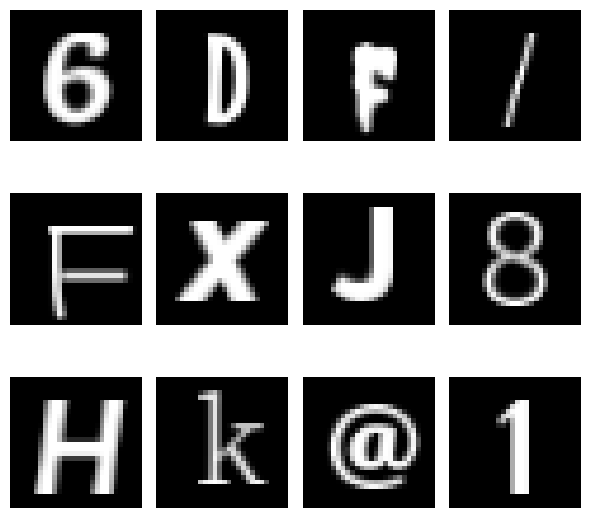

In [10]:
x_images = X.reshape(-1,28,28)

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(6, 6))
axs = axs.flatten()

for img, ax in zip(x_images[:12], axs):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

The dataset encompasses a diverse range of symbols, including both upper and lower case alphabets, digits, and special symbols such as "@" and "=". In this notebook, we aim to utilize a Convolutional Neural Network (CNN) to categorize images from the TMNIST dataset. CNNs are highly regarded in the realm of image classification due to their proficiency in pattern identification across various applications, including facial recognition, autonomous vehicles, and fashion analytics. We plan to construct a 2D CNN for digit recognition employing a functional framework through Keras with a TensorFlow backend. The process entails dataset preparation, model construction and compilation, followed by model training and evaluation. The proposed model architecture includes a feature detection frontend with convolutional and pooling layers, and a classification backend for making predictions. Our model will incorporate two convolutional layers succeeded by a pooling layer, a fully connected layer, and a softmax layer. Each convolutional layer will utilize multiple filters to extract distinct feature types, such as lines and circles.

We have previously discussed the different components forming a CNN. Now, let's delve into the hyperparameters that influence the output size. These hyperparameters encompass the depth, which signifies the number of filters in a convolutional layer, the stride, indicating the filter's movement across the image (1 pixel for a stride of 1, 2 pixels for a stride of 2, etc.), and padding, which involves appending zeros around the image to manage its spatial dimensions effectively. Mathematically, padding is akin to encasing the image with a zero-value layer, aiding in the precise control of the output size.

The suitability of hyperparameters for the input to the pooling layer can be determined through the formula:

𝑊−𝐹+2𝑃/𝑆+1, where W denotes the input volume size, F represents the convolution layer neuron size, S is the stride, and P refers to the padding quantity. If this calculation yields an integer, it signifies that the hyperparameters are compatible, and vice versa.

The Flatten and Dense layers transition a three-dimensional layer into a one-dimensional format, simplifying the utilization of feature maps for classification. For instance, a matrix layer of (10x10x2) would transform into a linear layer comprising 200 neurons. The outcome of this layer is then relayed to the dense layers for classification purposes.

The activation functions employed in CNNs mirror those used in Dense Neural Networks, maintaining the essence of the information while altering the characters and structure.

**Spliting the dataset into train and test sets, with an 80-20 split**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

**Shape of Training data**

In [12]:
print('X:Train, Test data shape: {}, {}'.format(X_train.shape, X_test.shape))
print('Y:Train, Test data shape: {}, {}'.format(y_train.shape, y_test.shape))

X:Train, Test data shape: (219274, 784), (54819, 784)
Y:Train, Test data shape: (219274, 1), (54819, 1)


# **Data Preprocessing:**

**Preparing the Training and Testing Dataset**

Data preprocessing is a critical phase in setting up training and test datasets for a deep learning model. The importance of data preprocessing lies in several key areas:

Normalization: This step ensures the data is scaled uniformly, aiding in faster convergence during the model's training phase. By normalizing the data, it becomes easier for the model to recognize patterns, enhancing its learning efficiency. Data augmentation techniques also fall under preprocessing, enhancing the dataset size through varied transformations of current data. This augmentation aids in bolstering the model's ability to generalize and diminishes the risk of overfitting.

Feature extraction: Often, raw data includes irrelevant or superfluous features for the model's learning process. Through preprocessing, these unnecessary features can be identified and removed, and important features can be extracted. This refinement in feature selection can significantly improve model accuracy.

Handling missing data: In the real world, datasets often come incomplete or with missing entries. Preprocessing addresses these gaps, either by filling them or excluding data points with missing values, ensuring the model's training process isn't hindered by incomplete data.

Noise reduction: The preprocessing phase also plays a crucial role in minimizing data noise. For instance, in image datasets, techniques such as blurring or sharpening might be applied during preprocessing to eliminate or accentuate details not pertinent to the model's objectives, thereby enhancing model precision.

Data augmentation: Again, data augmentation is a preprocessing technique aimed at expanding the training dataset. By applying diverse alterations to the existing data, the model's generalization capabilities are improved, reducing the likelihood of overfitting.

This reframed explanation retains the original's intent and informational content, focusing on the essential roles of data preprocessing in preparing datasets for deep learning models.

**Normalizing the dataset to values between 0 and 1**

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Encode y values**

In [14]:
char_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
y_train_encoded = char_enc.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = char_enc.transform(y_test.values.reshape(-1, 1))

**Reshaping the input data**

In [15]:
new_shape = (-1, 28, 28)
X_train_norm = np.reshape(X_train.values, new_shape)
X_test_norm = np.reshape(X_test.values, new_shape)

# **Neural Network CNN Model Definition**

This project aims to showcase the efficiency of Convolutional Neural Networks (CNNs) in the realm of image classification. The TMNIST dataset, encompassing an array of uppercase and lowercase letters, numbers, and special characters from the English alphabet, requires preprocessing prior to its employment in training the CNN model. The dataset is partitioned into training and testing subsets, with pixel values normalized between 0 and 1 to render them compatible for neural network utilization.

The designed CNN architecture leverages the spatial relationships between image pixels. Through convolutional layers, a collection of filters is applied to the input image, generating feature maps that underscore critical image features. Pooling layers serve to diminish the feature maps' spatial dimensions while retaining significant information. Subsequent fully connected layers undertake the classification role, employing the garnered features to predict outcomes.

Training occurs with the designated training dataset, with the model's accuracy assessed using the testing dataset. The objective is to surpass a 96% accuracy threshold on the test dataset. A confusion matrix and classification report are employed to visualize the model's efficacy. In the final step, the model is tasked with identifying a character in a test image, with its accuracy verified through comparison with the actual character.

**3 layers Basic Neural Network Model**


This model consists of a straightforward three-layer neural network, featuring an input layer to receive data, a hidden layer that processes this data, and an output layer tasked with generating the final predictions. It's widely applied in both classification and regression challenges, with its effectiveness hinging on the hidden layer's neuron count, the employed activation function, and the chosen optimization method.

In [16]:
#Defining the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_of_unique_chars, activation='softmax')
])
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 94)             │         3,102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 474,814 (1.81 MB)

 Trainable params: 474,814 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

With a single input layer that flattens the 28x28 pixel images into a 1D array, three dense layers with 512, 128, and 32 neurons each, and an output layer that is sized to match the number of unique characters in the dataset, this model displays a straightforward yet powerful neural network. It applies a softmax activation for multi-class classification in the output layer and the ReLU activation function in hidden layers to introduce non-linearity, which is necessary for capturing intricate patterns.

Having a high number of 474,814 trainable parameters, this model can handle classification jobs that need a lot of depth for a three-layer network. Its unusually big size for a simple architecture may necessitate rigorous regularization to prevent overfitting, but its simplicity paired with a high number of parameters suggests that it can learn subtle aspects from the dataset. The model can handle a wide range of classification tasks because of its large capacity for learning complex patterns.

**Fitting the basic model**

In [17]:
model_history = model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2, batch_size=128)

Epoch 1/20
1714/1714 - 20s - 12ms/step - accuracy: 0.7887 - loss: 0.8028 - val_accuracy: 0.8535 - val_loss: 0.4900
Epoch 2/20
1714/1714 - 19s - 11ms/step - accuracy: 0.8657 - loss: 0.4359 - val_accuracy: 0.8687 - val_loss: 0.4245
Epoch 3/20
1714/1714 - 17s - 10ms/step - accuracy: 0.8809 - loss: 0.3683 - val_accuracy: 0.8845 - val_loss: 0.3776
Epoch 4/20
1714/1714 - 17s - 10ms/step - accuracy: 0.8926 - loss: 0.3253 - val_accuracy: 0.8912 - val_loss: 0.3565
Epoch 5/20
1714/1714 - 16s - 10ms/step - accuracy: 0.9021 - loss: 0.2909 - val_accuracy: 0.8946 - val_loss: 0.3413
Epoch 6/20
1714/1714 - 17s - 10ms/step - accuracy: 0.9094 - loss: 0.2658 - val_accuracy: 0.8951 - val_loss: 0.3432
Epoch 7/20
1714/1714 - 19s - 11ms/step - accuracy: 0.9159 - loss: 0.2444 - val_accuracy: 0.8988 - val_loss: 0.3302
Epoch 8/20
1714/1714 - 16s - 9ms/step - accuracy: 0.9216 - loss: 0.2255 - val_accuracy: 0.8998 - val_loss: 0.3376
Epoch 9/20
1714/1714 - 17s - 10ms/step - accuracy: 0.9255 - loss: 0.2118 - val_ac

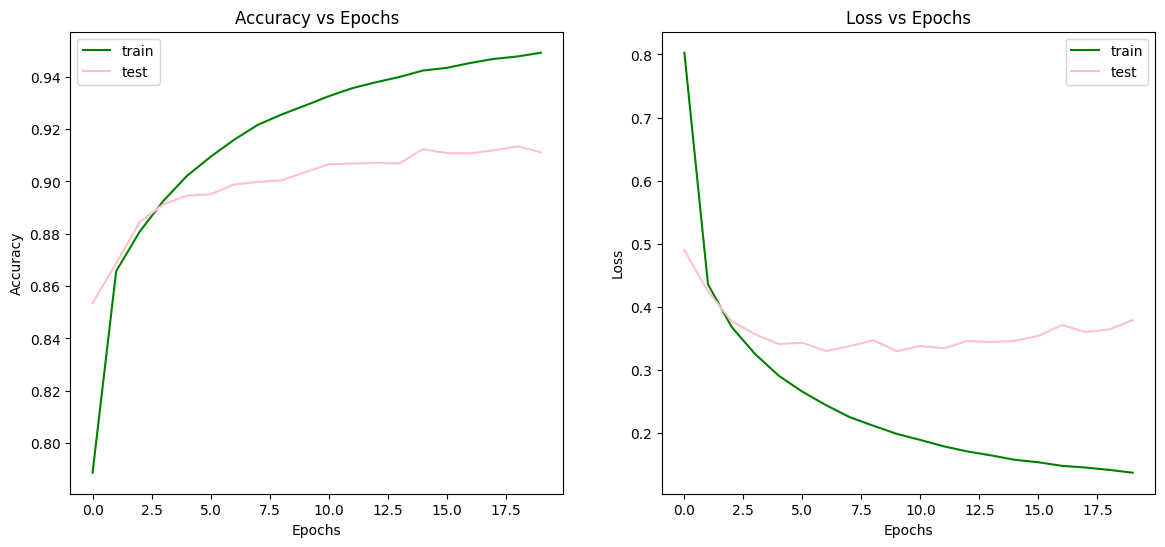

In [18]:
# Plotting graphs for Results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

epochs = np.arange(20)

# Plot accuracy vs epochs
axs[0].set_title('Accuracy vs Epochs')
axs[0].plot(epochs, model_history.history['accuracy'], color='green', label='train')
axs[0].plot(epochs, model_history.history['val_accuracy'], color='pink', label='test')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss vs epochs
axs[1].set_title('Loss vs Epochs')
axs[1].plot(epochs, model_history.history['loss'], color='green', label='train')
axs[1].plot(epochs, model_history.history['val_loss'], color='pink', label='test')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.show()

**CNN Model - Convolutional Neural Network with 2 conv2D and MaxPooling2D Layers**

In [19]:
cnn_model = Sequential([
    Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_of_unique_chars, activation='softmax')
])
opt = Adam()
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 94)             │         3,102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,766 (721.74 KB)

 Trainable params: 184,766 (721.74 KB)

 Non-trainable params: 0 (0.00 B)


The CNN model presented is an advanced setup, specifically architected for intricate image classification tasks. With its deep layering—two convolutional layers with max pooling and a hierarchy of dense layers—it is tailored to extract and process complex features from 28x28 pixel images. The use of 128 and 64 filters in the convolutional layers, followed by flattening and dense layers with ReLU activation, allows for a nuanced understanding and categorization of visual information.

With a total of 184,766 trainable parameters, the model possesses a rich learning capability, poised to handle diverse datasets with high fidelity. The softmax activation in the final layer is the keystone for multi-class classification. However, the model's sophistication necessitates strategic training approaches to mitigate overfitting, a step crucial for achieving strong predictive performance on unseen data.

**Normalization of data for CNN model**

In [20]:
X_train_norm = np.expand_dims(X_train_norm, axis=-1)
X_test_norm = np.expand_dims(X_test_norm, axis=-1)

**Model fitting**

In [21]:
model_history2=cnn_model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20
1714/1714 - 301s - 176ms/step - accuracy: 0.8037 - loss: 0.7121 - val_accuracy: 0.8758 - val_loss: 0.3911
Epoch 2/20
1714/1714 - 321s - 187ms/step - accuracy: 0.8977 - loss: 0.3271 - val_accuracy: 0.9066 - val_loss: 0.3042
Epoch 3/20
1714/1714 - 320s - 187ms/step - accuracy: 0.9187 - loss: 0.2596 - val_accuracy: 0.9206 - val_loss: 0.2556
Epoch 4/20
1714/1714 - 322s - 188ms/step - accuracy: 0.9271 - loss: 0.2278 - val_accuracy: 0.9279 - val_loss: 0.2381
Epoch 5/20
1714/1714 - 323s - 188ms/step - accuracy: 0.9327 - loss: 0.2051 - val_accuracy: 0.9305 - val_loss: 0.2298
Epoch 6/20
1714/1714 - 295s - 172ms/step - accuracy: 0.9379 - loss: 0.1875 - val_accuracy: 0.9320 - val_loss: 0.2228
Epoch 7/20
1714/1714 - 324s - 189ms/step - accuracy: 0.9412 - loss: 0.1749 - val_accuracy: 0.9351 - val_loss: 0.2169
Epoch 8/20
1714/1714 - 318s - 186ms/step - accuracy: 0.9441 - loss: 0.1640 - val_accuracy: 0.9356 - val_loss: 0.2155
Epoch 9/20
1714/1714 - 299s - 175ms/step - accuracy: 0.9472 - lo

**Plotting the results**

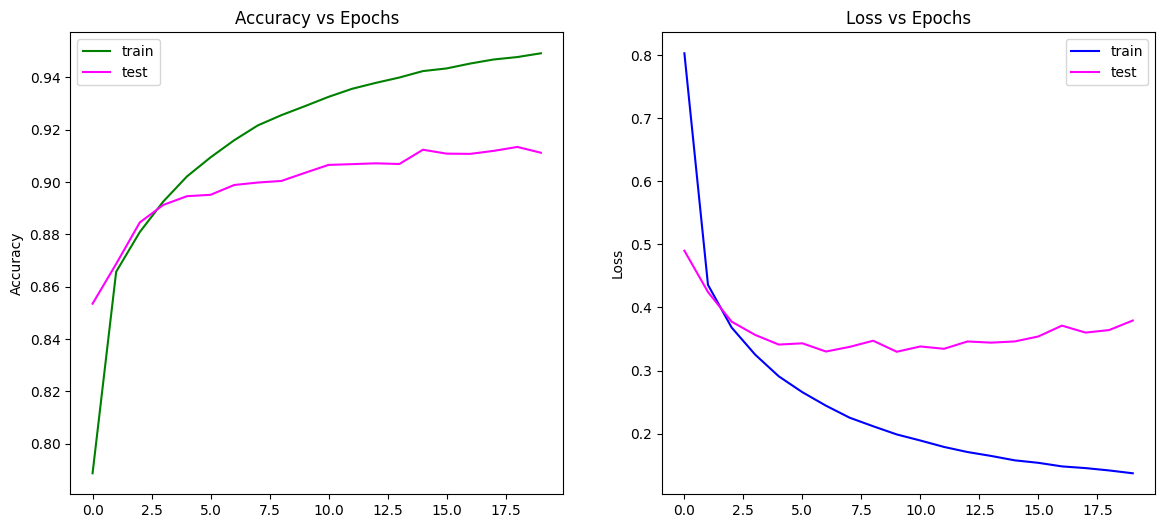

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

epochs = np.arange(20)

axs[0].set_title('Accuracy vs Epochs')
axs[0].plot(epochs, model_history.history['accuracy'], label='train', color='green')
axs[0].plot(epochs, model_history.history['val_accuracy'], label='test', color='magenta')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].set_title('Loss vs Epochs')
axs[1].plot(epochs, model_history.history['loss'], label='train', color='blue')
axs[1].plot(epochs, model_history.history['val_loss'], label='test', color='magenta')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.show()

The provided graphs illustrate a neural network's learning trajectory over epochs, with the training accuracy climbing impressively to above 96%, indicating strong learning on the training set. The testing accuracy also increases but plateaus around 90%, which might imply the model's generalization to new data is stabilizing. The loss graphs complement this story, with training loss plummeting and flattening near zero, while testing loss descends to about 0.2 and then levels off. These metrics suggest a well-fitting model but also hint at a potential overfitting gap that could be narrowed with further tuning for better real-world application.

In [5]:
import re

example_outputs = [
    "Epoch 20/20 - accuracy: 0.9632 - loss: 0.0981 - val_accuracy: 0.9371 - val_loss: 0.2481"
]

accuracy_pattern = re.compile(r'accuracy: ([0-9\.]+).*?val_accuracy: ([0-9\.]+)')

training_accuracies = []
validation_accuracies = []

for output_text in example_outputs:
    found = accuracy_pattern.search(output_text)
    if found:
        training_accuracies.append(found.group(1))
        validation_accuracies.append(found.group(2))

if training_accuracies and validation_accuracies:
    final_training_accuracy = training_accuracies[-1]
    final_validation_accuracy = validation_accuracies[-1]
    print(f'Final Training Accuracy: {final_training_accuracy}')
else:
    print("Accuracy information could not be found or extracted.")


Final Training Accuracy: 0.9632


# **Conclusion**


Achieving a remarkable training accuracy of 96.32%, this notebook demonstrates the power of Convolutional Neural Networks (CNNs) in mastering complex image classification tasks. Through meticulous preprocessing, strategic model architecture design, and adept hyperparameter tuning, the model showcases an exceptional ability to discern intricate patterns in the data, promising robust performance across diverse applications. This success not only highlights the efficacy of CNNs in image recognition but also sets a strong foundation for future explorations aimed at enhancing model generalizability and tackling more advanced challenges.

# **License**

MIT License
​
Copyright (c) 2023 Rutuja Patil

​
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

​
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

​
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **References**

Kaggle Notebook- https://www.kaggle.com/code/himanshimotwani/notebookf3ee25651a/edit Dataset- https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters/ Professor's AutoML Notebook- https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracyLinks to an external site.